In [46]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [47]:
!cp ./drive/MyDrive/physionet.zip .

cp: cannot stat './drive/MyDrive/physionet.zip': No such file or directory


In [48]:
!unzip physionet.zip

unzip:  cannot find or open physionet.zip, physionet.zip.zip or physionet.zip.ZIP.


In [49]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Paired")


df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/AI&Health/Coursework/cw_datasets/training_data.csv')

### Getting Info

In [50]:
df.head(15)

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.90,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.10,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.10,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.90,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.20,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
5,14998,AV+PV+TV+MV,Child,Male,NaN,NaN,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
6,23625,AV+PV+TV+MV,Child,Female,92.0,14.00,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,50379.0
7,24160,AV+PV+TV+MV,Child,Female,98.0,17.66,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
8,29045,AV+PV+TV+MV,Child,Female,88.0,12.50,False,Present,AV+MV+PV+TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
9,29378,AV+MV,Child,Female,82.0,10.70,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [51]:
print(df.columns)
print(df.info())
print(len(df))

Index(['Patient ID', 'Recording locations:', 'Age', 'Sex', 'Height', 'Weight',
       'Pregnancy status', 'Murmur', 'Murmur locations',
       'Most audible location', 'Systolic murmur timing',
       'Systolic murmur shape', 'Systolic murmur grading',
       'Systolic murmur pitch', 'Systolic murmur quality',
       'Diastolic murmur timing', 'Diastolic murmur shape',
       'Diastolic murmur grading', 'Diastolic murmur pitch',
       'Diastolic murmur quality', 'Outcome', 'Campaign', 'Additional ID'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Recording locations:      942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826

In [52]:
df.isnull().sum()

Patient ID                    0
Recording locations:          0
Age                          74
Sex                           0
Height                      116
Weight                      105
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Outcome                       0
Campaign                      0
Additional ID               802
dtype: int64

<Axes: >

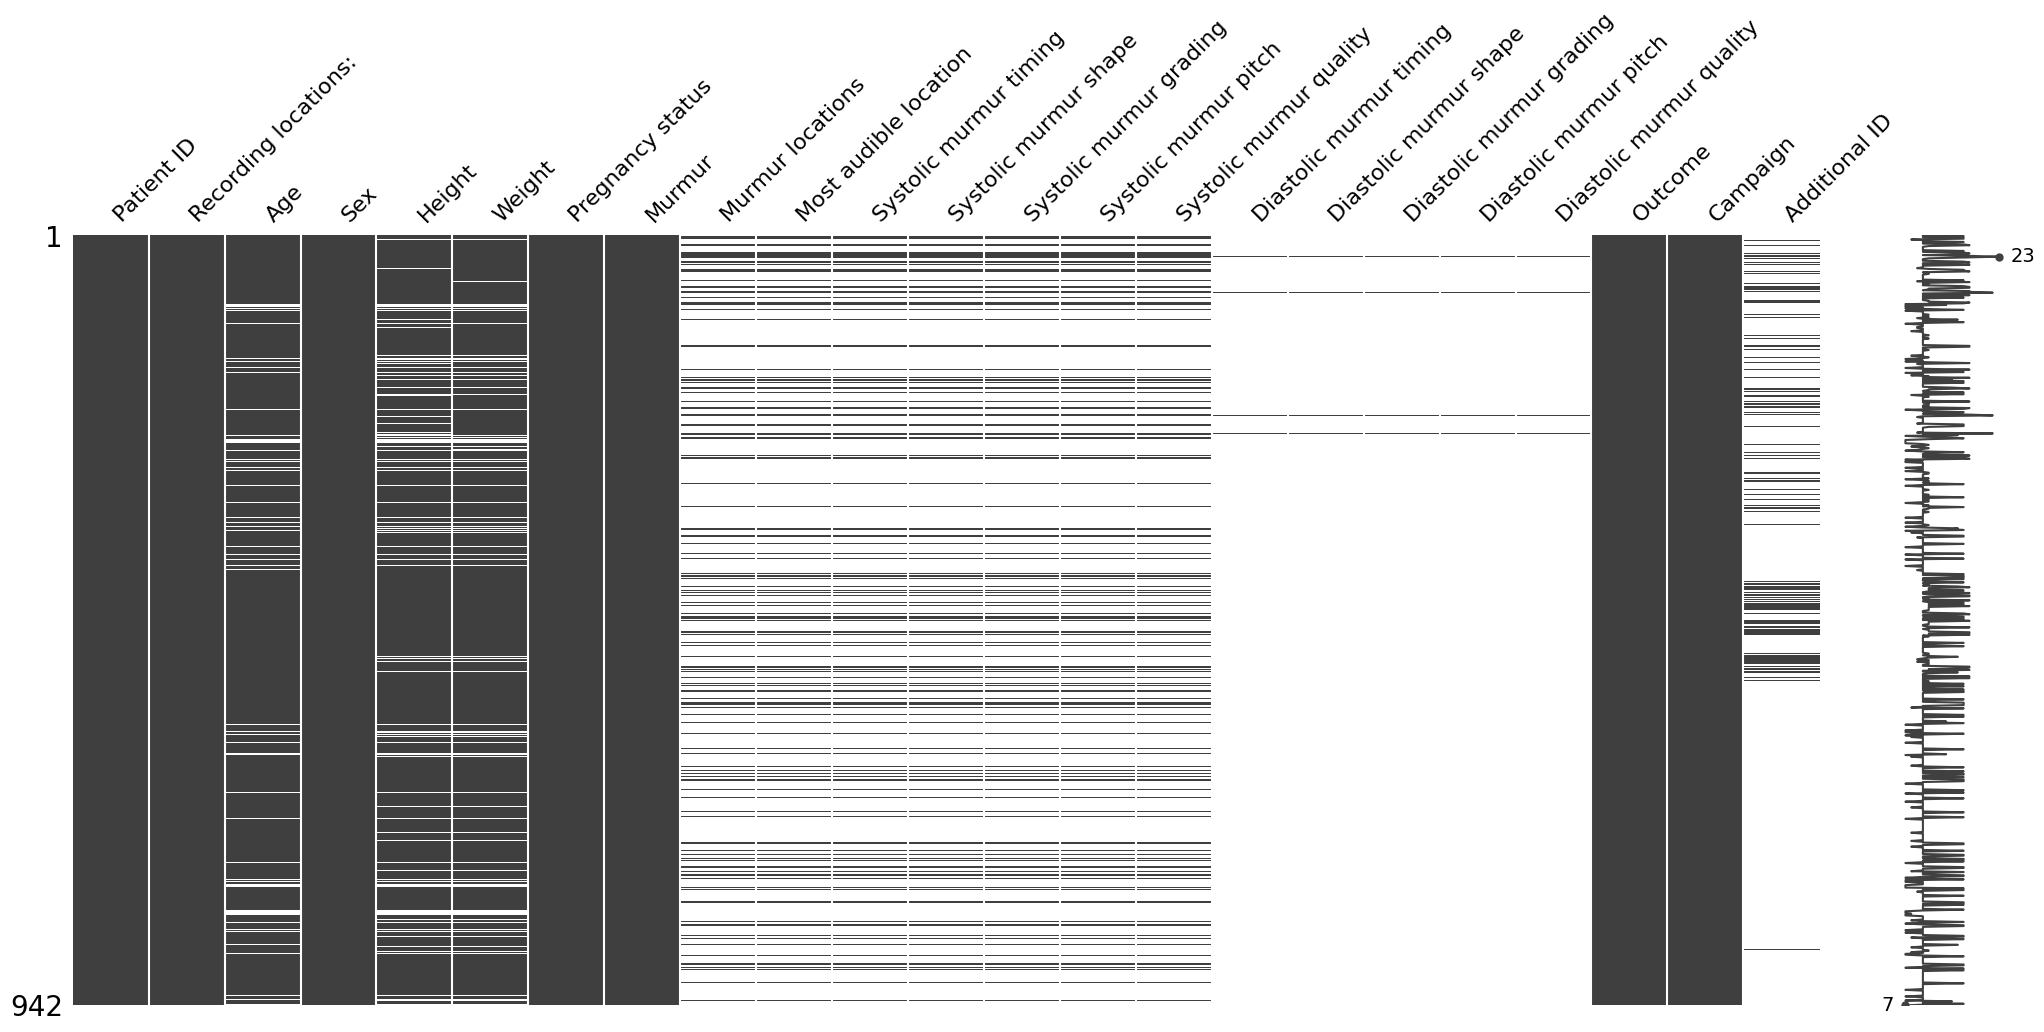

In [53]:
msno.matrix(df)

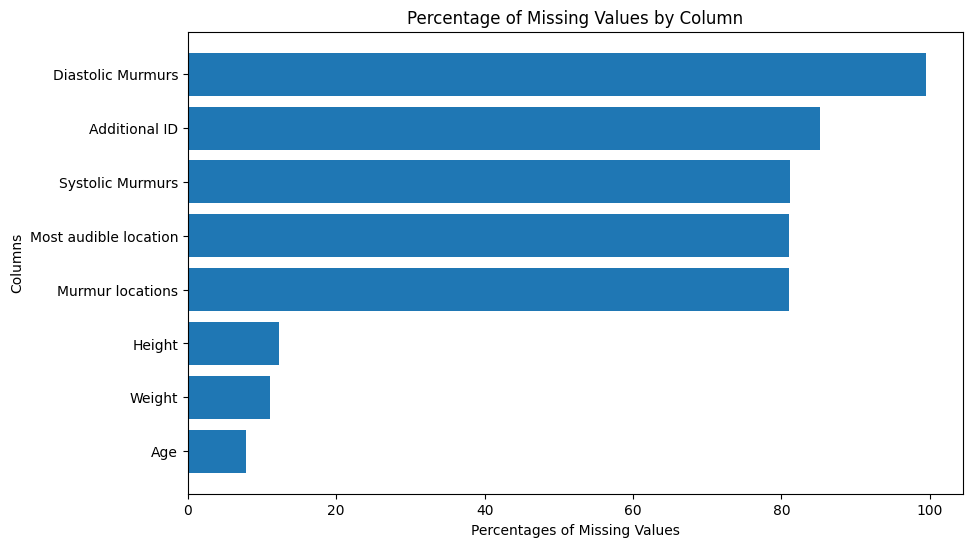

In [54]:
# Another visualisation for percentages of missing columns
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages

#show only cols with missing values
missing_percentages = missing_percentages[missing_percentages > 0]

#sorting percentages
missing_percentages.sort_values(inplace=True)

# Create a dictionary to map old columns to new ones
grouped_columns = {
    'Diastolic murmur timing': 'Diastolic Murmurs',
    'Diastolic murmur shape': 'Diastolic Murmurs',
    'Diastolic murmur grading': 'Diastolic Murmurs',
    'Diastolic murmur pitch': 'Diastolic Murmurs',
    'Diastolic murmur quality': 'Diastolic Murmurs',
    'Systolic murmur timing': 'Systolic Murmurs',
    'Systolic murmur shape': 'Systolic Murmurs',
    'Systolic murmur grading': 'Systolic Murmurs',
    'Systolic murmur pitch': 'Systolic Murmurs',
    'Systolic murmur quality': 'Systolic Murmurs',
}

# Group by new column names and calculate mean for each group
missing_percentages_grouped = missing_percentages.groupby(grouped_columns).mean()

# Add the non-grouped columns to the new Series
for col in missing_percentages.index:
    if col not in grouped_columns:
        missing_percentages_grouped[col] = missing_percentages[col]

# Sort and plot the new Series
missing_percentages_grouped.sort_values(inplace=True)

plt.figure(figsize=(10,6))
plt.barh(missing_percentages_grouped.index, missing_percentages_grouped)
plt.xlabel('Percentages of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')

plt.show()


### Dropping Columns

In [55]:
df = df.drop(columns=['Murmur locations',
       'Most audible location', 'Systolic murmur timing',
       'Systolic murmur shape', 'Systolic murmur grading',
       'Systolic murmur pitch', 'Systolic murmur quality',
       'Diastolic murmur timing', 'Diastolic murmur shape',
       'Diastolic murmur grading', 'Diastolic murmur pitch',
       'Diastolic murmur quality', 'Additional ID','Campaign','Patient ID',
        'Recording locations:' , 'Outcome'])

In [56]:
df.isnull().sum()

Age                  74
Sex                   0
Height              116
Weight              105
Pregnancy status      0
Murmur                0
dtype: int64

<Axes: >

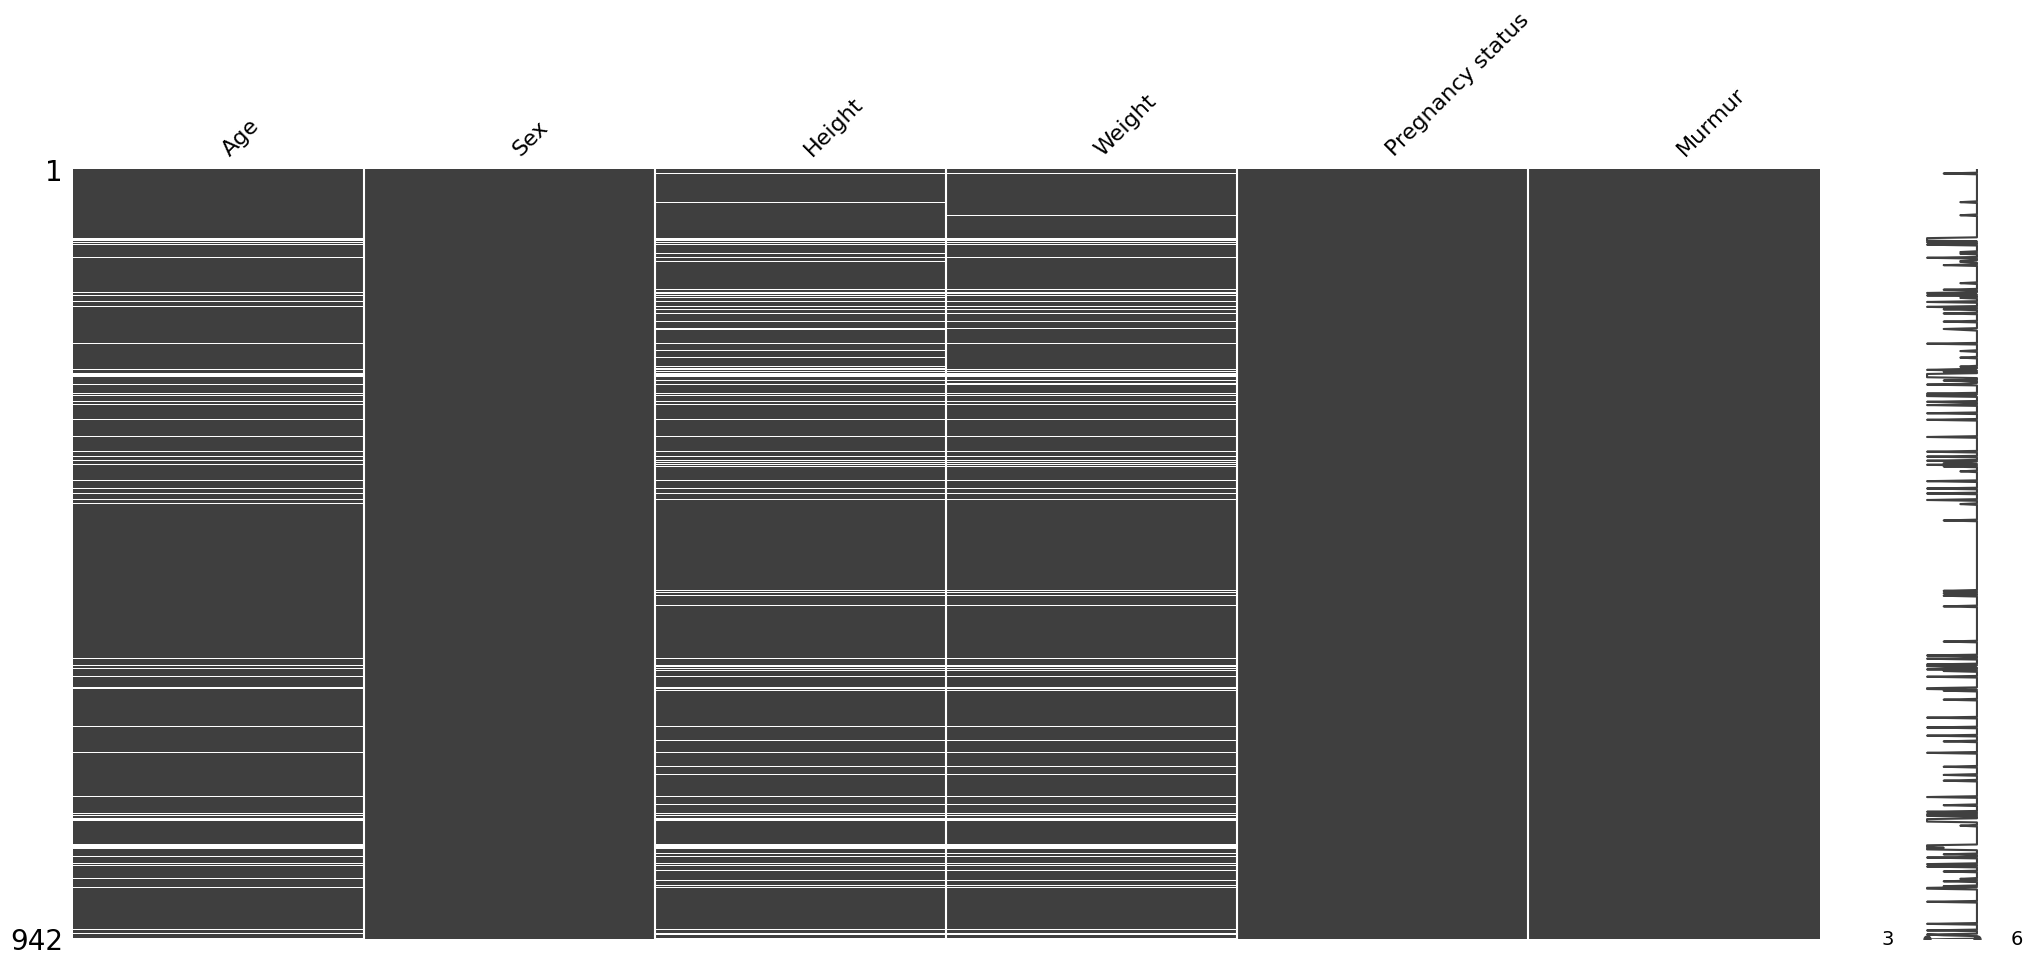

In [57]:
%matplotlib inline
msno.matrix(df)

# Categorical Values

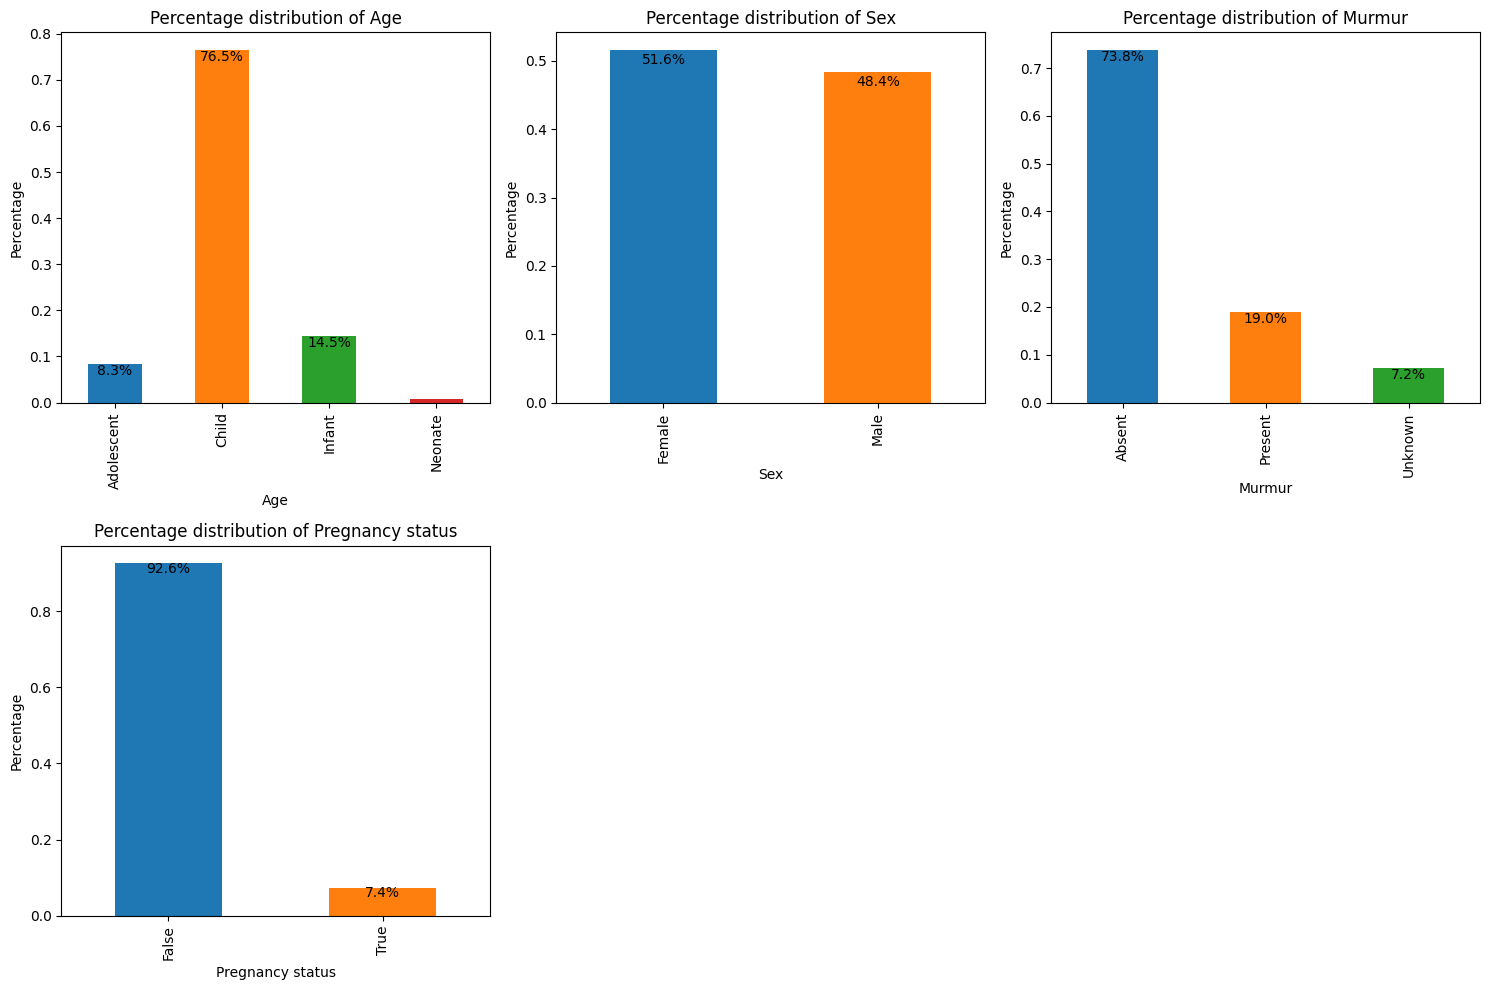

In [58]:
columns_to_plot = ['Age', 'Sex', 'Murmur','Pregnancy status']
num_rows = (len(columns_to_plot) + 2) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    total_count = len(df[column].dropna())
    ax = df[column].value_counts(normalize=True).sort_index().plot.bar(ax=axes[i], color=sns.color_palette())
    ax.set_title(f'Percentage distribution of {column}')
    ax.set_ylabel('Percentage')

    min_height = 0.03
    for p in ax.patches:
        if p.get_height() >= min_height:
            percentage = f"{p.get_height() * 100:.1f}%"
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height() - min_height / 2
            ax.annotate(percentage, (x, y), ha='center', va='center')

for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Drop row with unknow Murmur

In [59]:
row_to_drop = df[df['Murmur'] == "Unknown"].index
row_to_drop
df = df.drop(row_to_drop)

In [60]:
# Check if there is a row with Unknown Murmur
df[df['Murmur'] == "Unknown"]

,Age,Sex,Height,Weight,Pregnancy status,Murmur


In [61]:
df

,Age,Sex,Height,Weight,Pregnancy status,Murmur
0,Child,Female,98.0,15.9,False,Absent
1,Child,Female,103.0,13.1,False,Present
3,Child,Male,98.0,15.9,False,Present
4,Child,Male,87.0,11.2,False,Present
5,Child,Male,NaN,NaN,False,Absent
...,...,...,...,...,...,...
937,Child,Male,105.0,16.6,False,Absent
938,Child,Male,92.0,15.2,False,Absent
939,Child,Female,97.0,13.5,False,Present
940,Child,Female,132.0,38.1,False,Absent


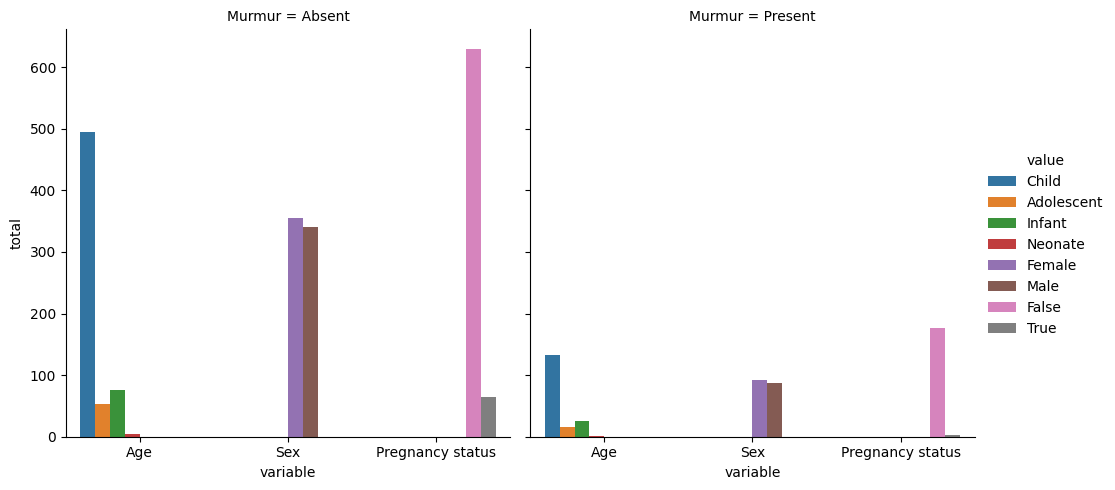

In [62]:
var = ['Age', 'Sex','Pregnancy status']
df_cat = pd.melt(df, id_vars=['Murmur'], value_vars=var)
graph = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="Murmur")
graph.set_ylabels('total', fontsize=10);

# Numerical Values

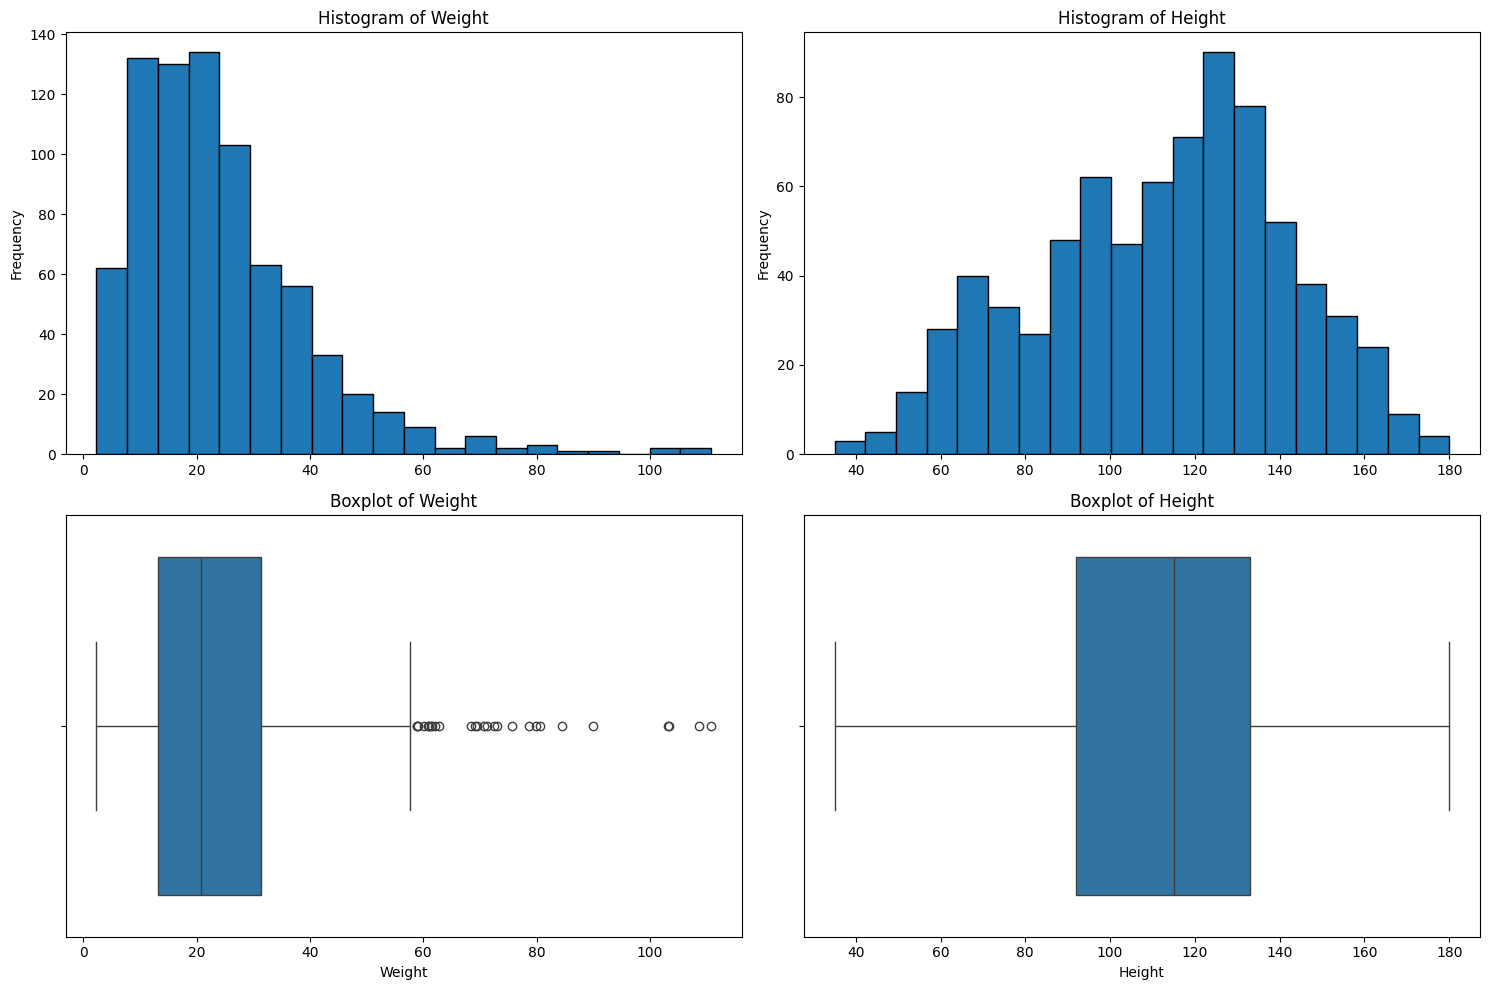

In [63]:
columns_to_plot = ['Weight', 'Height']
num_rows = (len(columns_to_plot) + 2) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    ax_hist = df[column].plot.hist(ax=axes[i], color=sns.color_palette(), edgecolor='black', bins=20)  # Adjust bins as needed
    ax_hist.set_title(f'Histogram of {column}')
    ax_hist.set_ylabel('Frequency')

    ax_box = sns.boxplot(x=df[column], ax=axes[i + len(columns_to_plot)], color=sns.color_palette()[0])
    ax_box.set_title(f'Boxplot of {column}')
    ax_box.set_xlabel(column)

for i in range(len(columns_to_plot) * 2, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [64]:
df

,Age,Sex,Height,Weight,Pregnancy status,Murmur
0,Child,Female,98.0,15.9,False,Absent
1,Child,Female,103.0,13.1,False,Present
3,Child,Male,98.0,15.9,False,Present
4,Child,Male,87.0,11.2,False,Present
5,Child,Male,NaN,NaN,False,Absent
...,...,...,...,...,...,...
937,Child,Male,105.0,16.6,False,Absent
938,Child,Male,92.0,15.2,False,Absent
939,Child,Female,97.0,13.5,False,Present
940,Child,Female,132.0,38.1,False,Absent


# Imputation

In [65]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Replace Nan with Adolescent in Age
df['Age'].fillna("Adolescent", inplace=True)

# One-hot encode categorical features
categorical_feature = ['Age']
df = pd.get_dummies(df, columns=categorical_feature)
age_columns = ['Age_Neonate', 'Age_Infant', 'Age_Child', 'Age_Adolescent']
df[age_columns] = df[age_columns].astype(int)
# Convert label into binary (Abnormal = 1 and Normal = 0)
df['Murmur'] = (df['Murmur'] == "Present" ).astype(int)
# Convert 'Pregnancy status' to binary: 1 for pregnant and 0 for non-pregnant
df['Pregnancy status'] = df['Pregnancy status'].astype(int)
# convert sex to binary (Female 1, Male 0)
df['Sex'] = (df['Sex'] == "Female").astype(int)

<ipython-input-66-a76be67bd79f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=heights_mean, palette='viridis')


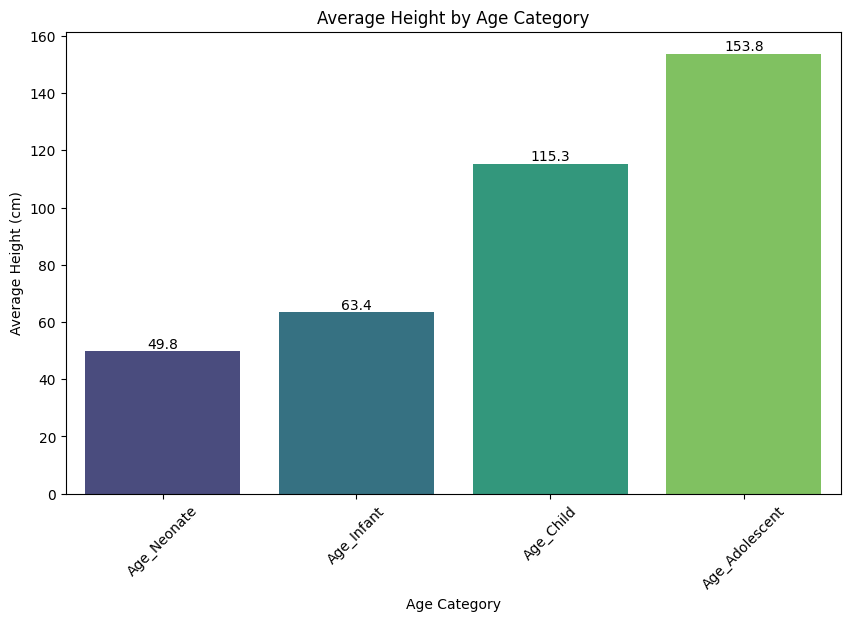

In [66]:
#average height for each category - using this to justify using mean height of each category for height imputation
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['Age_Neonate', 'Age_Infant', 'Age_Child', 'Age_Adolescent']

heights_mean = []

# Calculating mean height for each category
for category in categories:
    height_mean = df[df[category] == 1]['Height'].mean()
    heights_mean.append(height_mean)

# bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=heights_mean, palette='viridis')
plt.title('Average Height by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
for index, value in enumerate(heights_mean):
    plt.text(index, value, f'{value:.1f}', color='black', ha='center', va='bottom')
plt.show()

In [67]:
# Impute Height based on mean height of each age category

age_categories = ['Age_Neonate', 'Age_Infant', 'Age_Child', 'Age_Adolescent']

for category in age_categories:
    # Calculating the mean height for each category
    mean_height = round(df[df[category] == 1]['Height'].mean())

    # Imputing the missing heights with mean of each age category
    df.loc[(df[category] == 1) & (df['Height'].isnull()), 'Height'] = mean_height

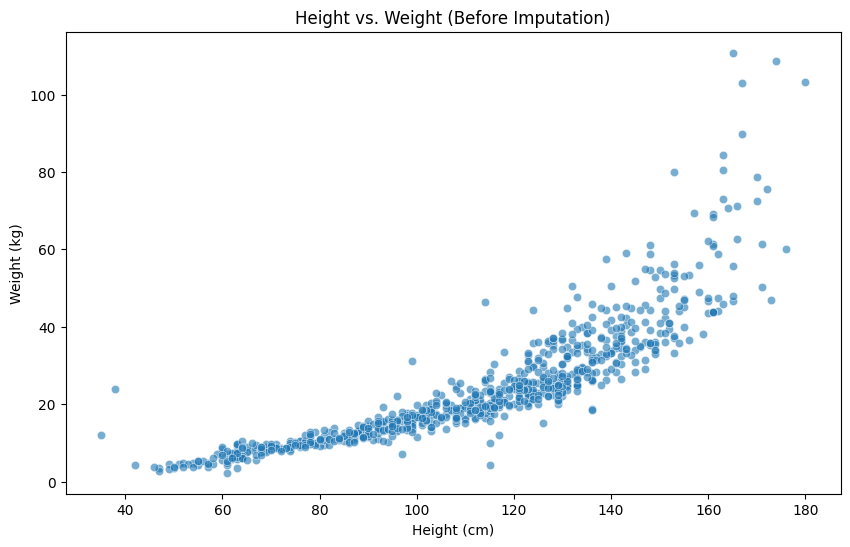

In [68]:
#Relationship between height and weight

# Scatter plot of the original data before height and weight imputation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=df.dropna(subset=['Height', 'Weight']), alpha=0.6)
plt.title('Height vs. Weight (Before Imputation)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [69]:
# Impute weight by Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

# getting non-null heights with null weights (weights we want to predict)
missing_weight_data = df[df['Weight'].isnull() & df['Height'].notnull()]

# If these rows exist --> polynomial regression
if not missing_weight_data.empty:
    degree = 2
    polynomial_regression = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Use non-null data to train the model
    train_data = df.dropna(subset=['Height', 'Weight'])
    polynomial_regression.fit(train_data[['Height']], train_data['Weight'])

    # Predict missing weights
    predicted_weights = polynomial_regression.predict(missing_weight_data[['Height']])

    # Impute the missing weights
    df.loc[missing_weight_data.index, 'Weight'] = predicted_weights

    # Ensuring no negative weights after prediction - because there are few outliers
    df.loc[df['Weight'] < 0, 'Weight'] = np.nan

# adding random weight gain for pregnant between 10 - 15 kg based on this
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3164947/#:~:text=For%20example%2C%20a%2016%2Dyear,of%2025%E2%80%9335%2Dlbs.
np.random.seed(0)
pregnant_indexes = df[df['Pregnancy status'] == 1].index
pregnancy_weight_adjustment = np.random.uniform(10, 15, size=len(pregnant_indexes))

# Apply the random weight gain
df.loc[pregnant_indexes, 'Weight'] += pregnancy_weight_adjustment

# Replace any weight below a realistic threshold (3.2 kg for newborns) with the threshold value
# https://www.johnsonsbabyarabia.com/en/normal-baby-growth-chart-height-length
min_weight_threshold = 3.2
df.loc[df['Weight'] < min_weight_threshold, 'Weight'] = min_weight_threshold

df['Weight'] = df['Weight'].round(1)

# Check for any negative predicted weights
negative_weights = df['Weight'] < 0
print(f"Number of negative predicted weights: {negative_weights.sum()}")

imputed_rows = df.loc[missing_weight_data.index]
imputed_rows[['Height', 'Weight', 'Pregnancy status']].head()


Number of negative predicted weights: 0


,Height,Weight,Pregnancy status
5,115.0,21.3,0
56,52.0,8.7,0
84,154.0,61.8,1
85,154.0,62.6,1
86,154.0,62.0,1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


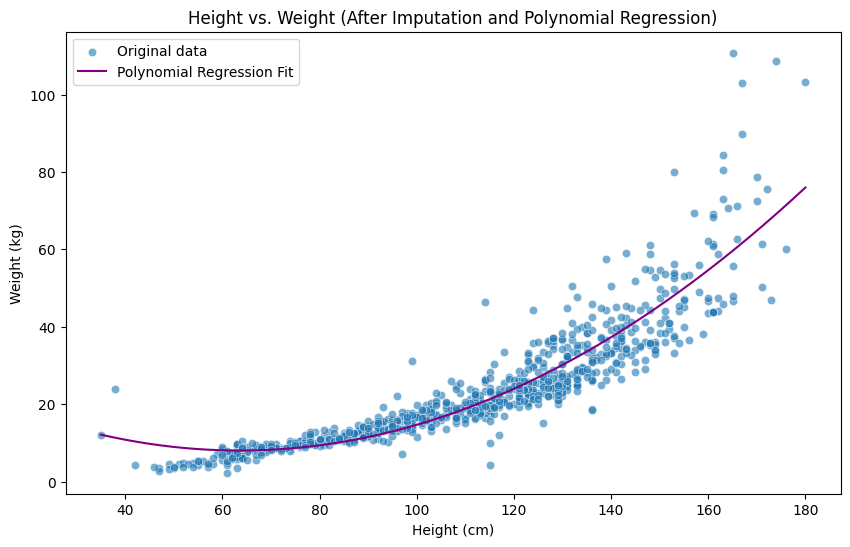

In [70]:
# Height and weight with regression curve
height_range = np.linspace(train_data['Height'].min(), train_data['Height'].max(), 300).reshape(-1, 1)
predicted_weight_range = polynomial_regression.predict(height_range)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=train_data, alpha=0.6, label='Original data')
sns.scatterplot(x='Height', y='Weight', data=missing_weight_data, color='red', label='Imputed data')
plt.plot(height_range, predicted_weight_range, color='purple', label='Polynomial Regression Fit')
plt.title('Height vs. Weight (After Imputation and Polynomial Regression)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

In [71]:
len(df)

874

In [77]:
df.isnull().sum()

Sex                 0
Height              0
Weight              0
Pregnancy status    0
Murmur              0
Age_Adolescent      0
Age_Child           0
Age_Infant          0
Age_Neonate         0
dtype: int64

In [78]:
df

,Sex,Height,Weight,Pregnancy status,Murmur,Age_Adolescent,Age_Child,Age_Infant,Age_Neonate
0,1,98.0,15.9,0,0,0,1,0,0
1,1,103.0,13.1,0,1,0,1,0,0
3,0,98.0,15.9,0,1,0,1,0,0
4,0,87.0,11.2,0,1,0,1,0,0
5,0,115.0,21.3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
937,0,105.0,16.6,0,0,0,1,0,0
938,0,92.0,15.2,0,0,0,1,0,0
939,1,97.0,13.5,0,1,0,1,0,0
940,1,132.0,38.1,0,0,0,1,0,0


In [80]:
# save the csv
df.to_csv('/content/drive/MyDrive/ColabNotebooks/AI&Health/Coursework/preprocessed_tabular.csv', index=False)